In [47]:
import tensorflow as tf
import numpy as np
# from tensorflow.keras.losses import sparse_cartigorical_crossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,y_train),(X_test,y_test) =cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
# normalize
X_train =X_train/255.0
X_test =X_test/255.0

X_train =np.expand_dims(X_train,axis=-1)
X_test =np.expand_dims(X_test,axis=-1)

In [7]:
X_train.shape

(50000, 32, 32, 3, 1)

In [8]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(4,4),activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,514 (537.16 KB)

 Trainable params: 137,514 (537.16 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
overall_history=model.fit(X_train,y_train,
                          epochs=10,
                          validation_data=(X_test,y_test),
                          verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3559 - loss: 1.7624 - val_accuracy: 0.5384 - val_loss: 1.2845
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.5568 - loss: 1.2457 - val_accuracy: 0.5805 - val_loss: 1.1873
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6236 - loss: 1.0770 - val_accuracy: 0.6149 - val_loss: 1.1075
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6508 - loss: 0.9959 - val_accuracy: 0.6475 - val_loss: 1.0253
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.6803 - loss: 0.9104 - val_accuracy: 0.6624 - val_loss: 0.9950
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.6999 - loss: 0.8714 - val_accuracy: 0.6684 - val_loss: 0.9734
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7158 - loss: 0.8197 - val_accuracy: 0.6567 - val_loss: 1.0046
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7322 -

In [24]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Model accuracy is {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6916 - loss: 0.9435
Model accuracy is 0.6845999956130981


In [36]:
pic =tf.keras.utils.load_img("dog_1.webp",target_size=(32,32))
pic_array =tf.keras.utils.img_to_array(pic)

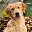

In [37]:
pic

In [38]:
pic_normalize =pic_array/255.0
pic_batch =np.expand_dims(pic_normalize,axis=0)

In [43]:
prediction_prob =model.predict(pic_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [44]:
pred_ind=np.argmax(prediction_prob)
pred_ind

np.int64(5)

In [45]:
class_names[pred_ind]

'dog'

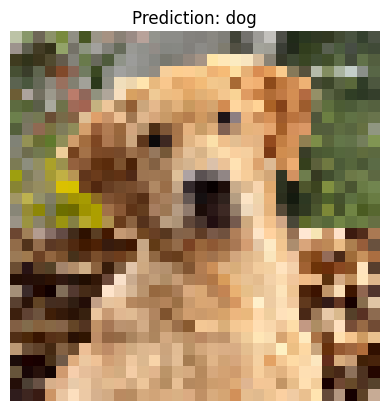

The model predicted this image is a: dog
Prediction probabilities: [[2.6501618e-06 2.4424235e-08 5.6709666e-03 1.0732588e-02 4.7279581e-02
  9.2786402e-01 3.8022995e-03 4.6476116e-03 1.0596603e-07 1.0389526e-07]]


In [46]:
plt.figure()
plt.imshow(pic)
plt.title(f"Prediction: {class_names[pred_ind]}")
plt.axis('off')
plt.show()

print(f"The model predicted this image is a: {class_names[pred_ind]}")
print(f"Prediction probabilities: {prediction_prob}")